In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv")

In [8]:
df.head()

,Tractor_PTO,Engine_Speed,Speed_Depression,FC
0,24.8,2003,163,7.15
1,24.8,2042,124,6.17
2,24.8,2067,99,5.04
3,24.8,2095,71,4.06
4,24.8,2122,44,3.01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tractor_PTO       257 non-null    float64
 1   Engine_Speed      257 non-null    int64  
 2   Speed_Depression  257 non-null    int64  
 3   FC                257 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 8.2 KB


In [4]:
df = df.dropna()
df.isnull().sum()

Tractor_PTO         0
Engine_Speed        0
Speed_Depression    0
FC                  0
dtype: int64

In [32]:
#fig, ax = plt.subplots(1,1, figsize=(12, 7))
#df.boxplot('Tractor_PTO', 'FC', ax=ax)
#plt.suptitle('Tractor_PTO Vs. FC')
#plt.title('')
#plt.ylabel('Tractor_PTO')
#plt.xticks(rotation=90)
#plt.show()

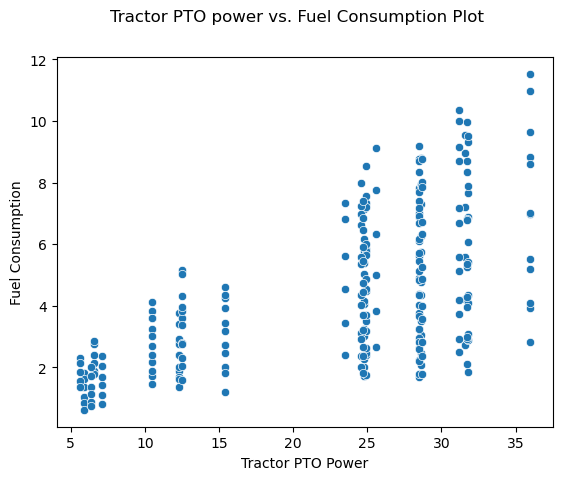

In [2]:
sns.scatterplot(x="Tractor_PTO", y="FC", data=df)
plt.suptitle('Tractor PTO power vs. Fuel Consumption Plot')
plt.title('')
plt.ylabel('Fuel Consumption')
plt.xlabel('Tractor PTO Power')
plt.show()

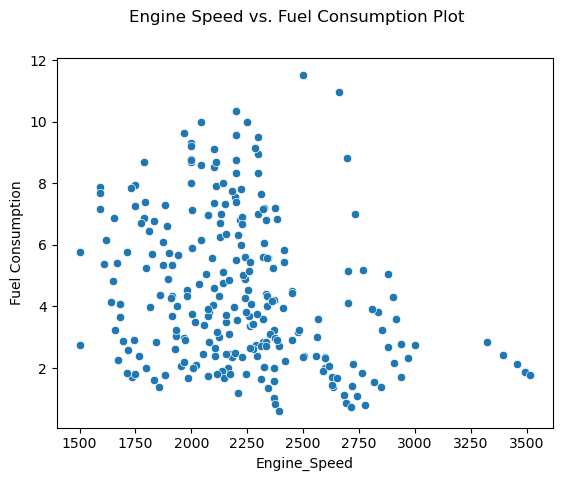

In [20]:
res = sns.scatterplot(x="Engine_Speed", y="FC", data=df)
plt.suptitle('Engine Speed vs. Fuel Consumption Plot')
plt.title('')
plt.ylabel('Fuel Consumption')
plt.xlabel('Engine_Speed')
plt.show()

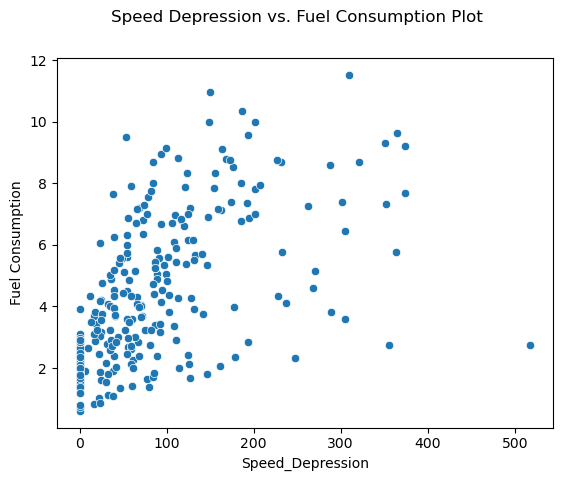

In [21]:
res = sns.scatterplot(x="Speed_Depression", y="FC", data=df)
plt.suptitle('Speed Depression vs. Fuel Consumption Plot')
plt.title('')
plt.ylabel('Fuel Consumption')
plt.xlabel('Speed_Depression')
plt.show()

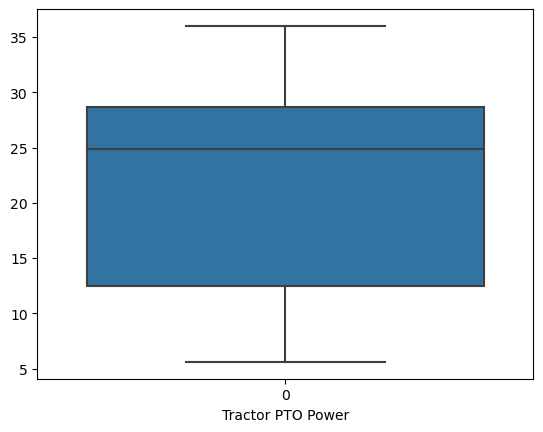

In [25]:
sns.boxplot( df['Tractor_PTO'])
plt.xlabel('Tractor PTO Power')
plt.show()

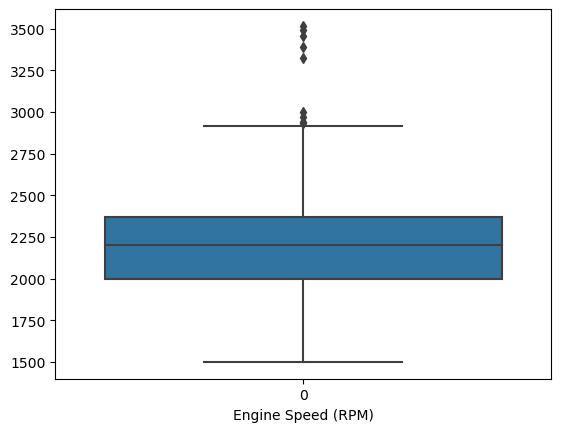

In [26]:
sns.boxplot( df['Engine_Speed'])
plt.xlabel('Engine Speed (RPM)')
plt.show()

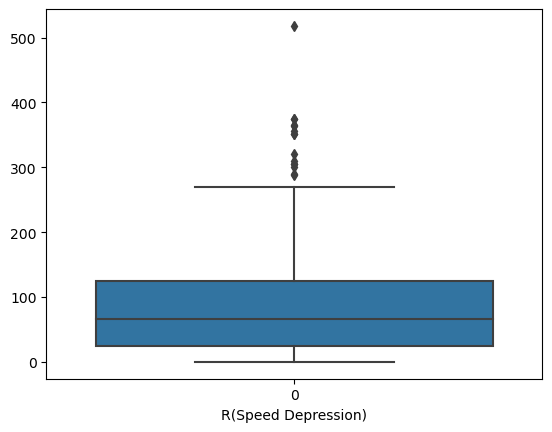

In [29]:
sns.boxplot( df['Speed_Depression'])
plt.xlabel('R(Speed Depression)')
plt.show()

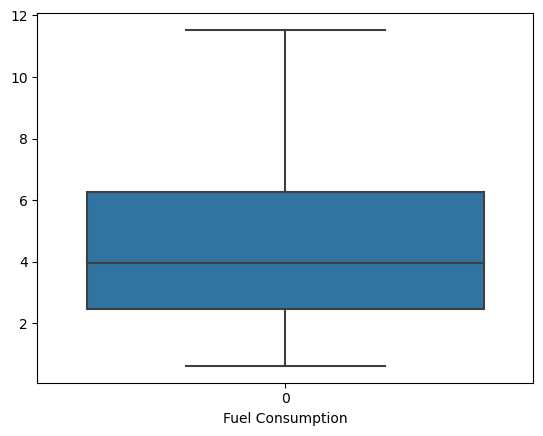

In [31]:
sns.boxplot( df['FC'])
plt.xlabel('Fuel Consumption')
plt.show()

In [6]:
X = df.drop("FC", axis=1)
y = df["FC"]

In [7]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [8]:
y_pred = linear_reg.predict(X)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

1.3837842759252088

In [10]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [11]:
y_pred = dec_tree_reg.predict(X)

In [12]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("L/h{:,.02f}".format(error))

L/h0.00


In [13]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [14]:
y_pred = random_forest_reg.predict(X)

In [16]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("L/h{:,.02f}".format(error))

L/h0.34


In [17]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [18]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("L/h{:,.02f}".format(error))

L/h0.99


In [19]:
X

,Tractor_PTO,Engine_Speed,Speed_Depression
0,24.8,2003,163
1,24.8,2042,124
2,24.8,2067,99
3,24.8,2095,71
4,24.8,2122,44
...,...,...,...
252,28.7,1776,106
253,28.7,1795,87
254,28.7,1814,68
255,28.7,1840,42


In [20]:
X = np.array([['24.8', '1500','233' ]])
X

array([['24.8', '1500', '233']], dtype='<U4')

In [21]:
y_pred = regressor.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7.1375])

In [22]:
y_pred = random_forest_reg.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.224])

In [23]:
y_pred = dec_tree_reg.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.77])

In [24]:
import pickle

In [25]:
data = {"model": regressor}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [26]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]


In [27]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7.1375])

In [28]:
data = {"model2": random_forest_reg}
with open('saved_steps2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [29]:
with open('saved_steps2.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded2 = data["model2"]

In [30]:
y_pred = regressor_loaded2.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.224])

In [31]:
data = {"model3": dec_tree_reg}
with open('saved_steps3.pkl', 'wb') as file:
    pickle.dump(data, file)

In [33]:
with open('saved_steps3.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded3 = data["model3"]

In [34]:
y_pred = regressor_loaded3.predict(X)
y_pred

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.77])